<a href="https://colab.research.google.com/github/viethoang1122334/Machine-Learning/blob/master/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 8: Fruit Classification

Download Fruit data

In [0]:
#from google.colab import files
#files.upload()

In [0]:
#!pip install -q kaggle

In [0]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/

In [0]:
#!kaggle datasets list -s fruits

ref                                                         title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
moltean/fruits                                              Fruits 360                                         734MB  2019-11-04 21:16:32          31270  
sriramr/fruits-fresh-and-rotten-for-classification          Fruits fresh and rotten for classification           4GB  2018-08-24 15:05:40           1246  
mjamilmoughal/fruits-with-colors-dataset                    Fruits with colors dataset                          816B  2018-01-13 10:22:33           2621  
mbkinaci/fruit-images-for-object-detection                  Fruit Images for Object Detection                   28MB  2018-07-01 20:21:59           3842  
prasunroy/natural-images                                    Natural Im

In [0]:
#!kaggle datasets download -d moltean/fruits
#!ls

100% 734M/734M [00:07<00:00, 124MB/s]
100% 734M/734M [00:07<00:00, 103MB/s]
fruits.zip  kaggle.json  sample_data


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#!ls "/content"

fruits.zip  gdrive  kaggle.json  sample_data


In [0]:
#!unzip -q "/content/fruits.zip"

In [0]:
#!unzip  "/content/fruits.zip" -d "/content/gdrive/My Drive/Fruit"


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Split folder

In [0]:
pip install split-folders

In [0]:
import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#split_folders.ratio('input_folder', output="output", seed=1337, ratio=(.8, .1, .1)) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
split_folders.fixed('/content/gdrive/My Drive/Fruit/fruits-360_dataset/fruits-360/Training',
                    output="/content/gdrive/My Drive/Fruit/validation",
                    seed=1337, fixed=(100, 100), oversample=False) # default values


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:07,  7.58s/ files]
Copying files: 2 files [00:08,  5.45s/ files]
Copying files: 3 files [00:08,  3.94s/ files]
Copying files: 4 files [00:09,  2.98s/ files]
Copying files: 5 files [00:09,  2.20s/ files]
Copying files: 6 files [00:10,  1.68s/ files]
Copying files: 7 files [00:10,  1.36s/ files]
Copying files: 8 files [00:11,  1.08s/ files]
Copying files: 9 files [00:11,  1.19 files/s]
Copying files: 10 files [00:11,  1.38 files/s]
Copying files: 11 files [00:12,  1.63 files/s]
Copying files: 12 files [00:12,  1.90 files/s]
Copying files: 13 files [00:12,  1.97 files/s]
Copying files: 14 files [00:13,  1.92 files/s]
Copying files: 15 files [00:13,  2.07 files/s]
Copying files: 16 files [00:15,  1.19 files/s]
Copying files: 17 files [00:16,  1.32 files/s]
Copying files: 18 files [00:16,  1.58 files/s]
Copying files: 19 files [00:17,  1.69 files/s]
Copying files: 20 files [00:17,  1.77 files/s]
Copying files: 21 files [0

ValueError: ignored

Build CNN

In [7]:
import os
root_train='/content/gdrive/My Drive/Fruit/validation/train'
dirlist_train = [ item for item in os.listdir(root_train) if os.path.isdir(os.path.join(root_train, item)) ]
print(dirlist_train)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado ripe', 'Avocado', 'Banana Lady Finger', 'Banana Red', 'Banana', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Dates', 'Eggplant']


In [8]:
batch_size = 128
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/Fruit/validation/train',  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 100 x 100
        batch_size=batch_size,# Specify the classes explicitly
        classes = dirlist_train, # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 11266 images belonging to 37 classes.


In [9]:
validation_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = validation_datagen.flow_from_directory('/content/gdrive/My Drive/Fruit/validation/val',
                                                        target_size=(100, 100),
                                                        batch_size=batch_size,
                                                        classes = dirlist_train,
                                                        class_mode='categorical')

Found 3700 images belonging to 37 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory('/content/gdrive/My Drive/Fruit/validation/test',
                                                        target_size=(100, 100),
                                                        batch_size=batch_size,
                                                        classes = dirlist_train,
                                                        class_mode='categorical')

Found 3700 images belonging to 37 classes.


In [0]:
import tensorflow as tf

In [0]:
#import keras

In [12]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(37, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          3

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
#model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
total_sample_train=train_generator.n

In [0]:
total_sample_val=validation_generator.n

In [0]:
n_epochs = 30

In [18]:
#history = model.fit_generator(
#        train_generator, 
#        steps_per_epoch=int(total_sample_train/batch_size),  
#        epochs=n_epochs,
#        validation_data=validation_generator,
#        validation_steps=int(total_sample_validation/batch_size)
#        verbose=1)
history = model.fit_generator(train_generator, 
    steps_per_epoch=int(total_sample_train/batch_size),
    epochs=n_epochs, validation_data=validation_generator,
    validation_steps=int(total_sample_val/batch_size) )

Epoch 1/30
88/88 [==============================] - 120s 1s/step - loss: 2.1797 - acc: 0.3807 - val_loss: 0.7930 - val_acc: 0.7514
Epoch 2/30
88/88 [==============================] - 119s 1s/step - loss: 0.8838 - acc: 0.7254 - val_loss: 0.4855 - val_acc: 0.8644
Epoch 3/30
88/88 [==============================] - 119s 1s/step - loss: 0.4659 - acc: 0.8530 - val_loss: 0.3115 - val_acc: 0.8945
Epoch 4/30
88/88 [==============================] - 119s 1s/step - loss: 0.3705 - acc: 0.8772 - val_loss: 0.1794 - val_acc: 0.9286
Epoch 5/30
88/88 [==============================] - 119s 1s/step - loss: 0.2596 - acc: 0.9190 - val_loss: 0.0744 - val_acc: 0.9844
Epoch 6/30
88/88 [==============================] - 119s 1s/step - loss: 0.1787 - acc: 0.9448 - val_loss: 0.0332 - val_acc: 0.9955
Epoch 7/30
88/88 [==============================] - 119s 1s/step - loss: 0.1738 - acc: 0.9559 - val_loss: 0.0751 - val_acc: 0.9757
Epoch 8/30
88/88 [==============================] - 119s 1s/step - loss: 0.1609 - a

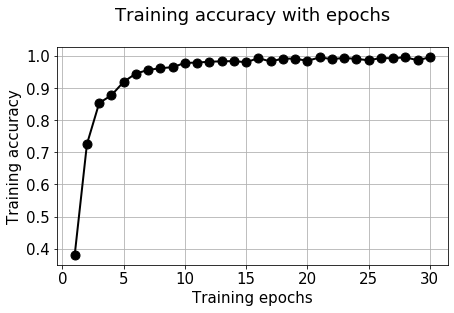

In [19]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

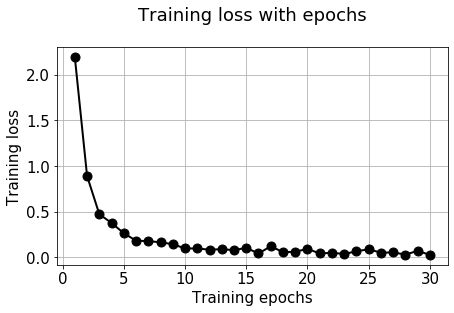

In [20]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [0]:
#To save this model 
model.save('/content/gdrive/My Drive/Fruit/my_model.h5')

In [0]:
#To load this model
#from keras.models import load_model
#model = load_model('/content/gdrive/My Drive/Fruit/my_model.h5')

#import tensorflow as tf 
#model = tf.keras.models.load_model('/content/gdrive/My Drive/Fruit/my_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Confusion Matrix and Classification Report

In [0]:
listdata = list(train_generator.class_indices.keys())

Test data

In [47]:
total_sample_test=test_generator.n
total_sample_test

3700

In [0]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
#Confusion Matrix and Classification Report
Y_pred = model.predict_generator(test_generator, total_sample_test // batch_size+1)
#y_pred = np.argmax(Y_pred, axis=1)

In [0]:
y_pred = np.argmax(Y_pred, axis=1)

In [31]:
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = dirlist_train
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[1 3 0 ... 2 1 2]
 [3 4 4 ... 1 1 6]
 [1 1 2 ... 4 1 2]
 ...
 [6 3 1 ... 5 0 2]
 [3 3 2 ... 4 1 5]
 [3 1 1 ... 1 5 2]]
Classification Report
                     precision    recall  f1-score   support

     Apple Braeburn       0.01      0.01      0.01       100
 Apple Crimson Snow       0.04      0.04      0.04       100
     Apple Golden 1       0.02      0.02      0.02       100
     Apple Golden 2       0.03      0.03      0.03       100
     Apple Golden 3       0.02      0.02      0.02       100
 Apple Granny Smith       0.01      0.01      0.01       100
    Apple Pink Lady       0.03      0.03      0.03       100
        Apple Red 1       0.04      0.04      0.04       100
        Apple Red 2       0.02      0.02      0.02       100
        Apple Red 3       0.03      0.03      0.03       100
Apple Red Delicious       0.01      0.01      0.01       100
 Apple Red Yellow 1       0.03      0.03      0.03       100
 Apple Red Yellow 2       0.02      0.02      0

Validation data

In [0]:
#Confusion Matrix and Classification Report
Y_pred_val = model.predict_generator(validation_generator, total_sample_val // batch_size+1)
y_pred_val = np.argmax(Y_pred_val, axis=1)

In [61]:
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred_val))
print('Classification Report')
target_names = listdata
#target_names = dirlist_train
print(classification_report(validation_generator.classes, y_pred_val, target_names=target_names))

Confusion Matrix
[[3 0 7 ... 3 4 2]
 [2 4 8 ... 3 2 3]
 [2 3 5 ... 3 4 1]
 ...
 [1 1 3 ... 1 3 2]
 [1 2 3 ... 4 2 3]
 [2 3 1 ... 3 4 3]]
Classification Report
                     precision    recall  f1-score   support

     Apple Braeburn       0.03      0.03      0.03       100
 Apple Crimson Snow       0.04      0.04      0.04       100
     Apple Golden 1       0.05      0.05      0.05       100
     Apple Golden 2       0.00      0.00      0.00       100
     Apple Golden 3       0.02      0.02      0.02       100
 Apple Granny Smith       0.03      0.03      0.03       100
    Apple Pink Lady       0.04      0.04      0.04       100
        Apple Red 1       0.02      0.02      0.02       100
        Apple Red 2       0.03      0.03      0.03       100
        Apple Red 3       0.02      0.02      0.02       100
Apple Red Delicious       0.02      0.02      0.02       100
 Apple Red Yellow 1       0.03      0.03      0.03       100
 Apple Red Yellow 2       0.03      0.03      0

Train data

In [0]:
#Confusion Matrix and Classification Report
Y_pred_train = model.predict_generator(train_generator, total_sample_train // batch_size+1)
y_pred_train = np.argmax(Y_pred_train, axis=1)

In [50]:
print('Confusion Matrix')
print(confusion_matrix(train_generator.classes, y_pred_train))
print('Classification Report')
target_names = dirlist_train
print(classification_report(train_generator.classes, y_pred_train, target_names=target_names))

Confusion Matrix
[[ 8  4  7 ...  9  5  9]
 [ 1  5 11 ...  8  6  2]
 [ 9  5 13 ...  6  9  7]
 ...
 [ 7  5  8 ...  7  8  3]
 [ 4  5 10 ... 13  6 12]
 [ 5  7  7 ...  8  5 12]]
Classification Report
                     precision    recall  f1-score   support

     Apple Braeburn       0.03      0.03      0.03       292
 Apple Crimson Snow       0.02      0.02      0.02       244
     Apple Golden 1       0.04      0.04      0.04       292
     Apple Golden 2       0.02      0.02      0.02       292
     Apple Golden 3       0.03      0.03      0.03       281
 Apple Granny Smith       0.02      0.02      0.02       292
    Apple Pink Lady       0.02      0.02      0.02       256
        Apple Red 1       0.03      0.03      0.03       292
        Apple Red 2       0.03      0.03      0.03       292
        Apple Red 3       0.02      0.02      0.02       229
Apple Red Delicious       0.02      0.02      0.02       290
 Apple Red Yellow 1       0.01      0.01      0.01       292
 Apple Red 

Test on image

In [0]:
from PIL import Image
img_test=Image.open('/content/gdrive/My Drive/Fruit/fruits-360_dataset/fruits-360/Test/Apple Braeburn/r_90_100.jpg')

In [0]:
img_test = img_test.resize((100,100))

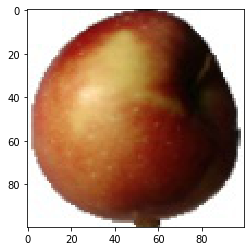

In [54]:
plt.imshow(img_test)
plt.show()

In [0]:
# Expand dimensions for proper prediction
import numpy as np
img_test=np.expand_dims(img_test,axis=0)

In [56]:
model.predict(img_test)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]], dtype=float32)

In [57]:
y_prob = model.predict(img_test) 
y_classes = y_prob.argmax(axis=-1)
y_classes

array([8])

In [58]:
label_map = (train_generator.class_indices)
label_map

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 15,
 'Avocado ripe': 14,
 'Banana': 18,
 'Banana Lady Finger': 16,
 'Banana Red': 17,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Dates': 35,
 'Eggplant': 36}